# Q1

In [1]:
import pandas as pd
import math
from collections import Counter

data = pd.read_csv('Lab9_1.csv')
df = pd.DataFrame(data, columns=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])

def entropy(data):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(data['Decision'])
    ent = 0
    for count in counts.values():
        prob = count / total
        ent -= prob * math.log2(prob) if prob > 0 else 0
    return ent

def weighted_entropy(data, feature):
    total = len(data)
    values = data[feature].unique()
    weighted_ent = 0

    for value in values:
        subset = data[data[feature] == value]
        weighted_ent += (len(subset) / total) * entropy(subset)

    return weighted_ent

def gain_ratio(data, feature):
    total_entropy = entropy(data)
    weighted_ent = weighted_entropy(data, feature)
    gain = total_entropy - weighted_ent

    split_info = -sum((len(data[data[feature] == value]) / len(data)) * 
                      math.log2(len(data[data[feature] == value]) / len(data)) 
                      for value in data[feature].unique() if len(data[data[feature] == value]) > 0)

    return gain / split_info if split_info != 0 else 0

def best_split(data, features):
    best_feature = None
    best_gain_ratio = -float('inf')

    for feature in features:
        ratio = gain_ratio(data, feature)
        if ratio > best_gain_ratio:
            best_gain_ratio = ratio
            best_feature = feature

    return best_feature

def build_tree(data, features):
    if len(set(data['Decision'])) == 1:
        return data['Decision'].iloc[0]

    if len(features) == 0:
        return Counter(data['Decision']).most_common(1)[0][0]

    best_feature = best_split(data, features)
    tree = {best_feature: {}}

    remaining_features = [f for f in features if f != best_feature]
    feature_values = data[best_feature].unique()

    for value in feature_values:
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, remaining_features)

    return tree

def classify(tree, sample):
    while isinstance(tree, dict):
        feature = next(iter(tree))
        feature_value = sample[feature]
        tree = tree[feature].get(feature_value, "Unknown")
    return tree

features = ['Outlook', 'Temp', 'Humidity', 'Wind']
decision_tree = build_tree(df, features)

print("C4.5 Decision Tree:", decision_tree)

new_sample = {'Outlook': 'Sunny', 'Temp': 75, 'Humidity': 70, 'Wind': 'Strong'}
classification = classify(decision_tree, new_sample)

print(f"Classification for new sample: {classification}")


C4.5 Decision Tree: {'Temp': {85: 'No', 80: 'No', 83: 'Yes', 70: 'Yes', 68: 'Yes', 65: 'No', 64: 'Yes', 72: {'Outlook': {'Sunny': 'No', 'Overcast': 'Yes'}}, 69: 'Yes', 75: 'Yes', 81: 'No', 71: 'Yes'}}
Classification for new sample: Yes


# Q2

In [2]:
import pandas as pd
import math
from collections import Counter

data = pd.read_csv("Lab9_1.csv")

df = pd.DataFrame(data, columns=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])

def gini_impurity(data):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(data['Decision'])
    impurity = 1
    for count in counts.values():
        prob = count / total
        impurity -= prob ** 2
    return impurity

def gini_for_split(data, feature):
    total = len(data)
    values = data[feature].unique()
    weighted_impurity = 0

    for value in values:
        subset = data[data[feature] == value]
        weighted_impurity += (len(subset) / total) * gini_impurity(subset)

    return weighted_impurity

def best_split(data, features):
    best_feature = None
    best_gini = float('inf')

    for feature in features:
        gini = gini_for_split(data, feature)
        if gini < best_gini:
            best_gini = gini
            best_feature = feature

    return best_feature

def build_tree(data, features):
    if len(set(data['Decision'])) == 1:
        return data['Decision'].iloc[0]

    if len(features) == 0:
        return Counter(data['Decision']).most_common(1)[0][0]

    best_feature = best_split(data, features)

    tree = {best_feature: {}}

    remaining_features = [f for f in features if f != best_feature]
    feature_values = data[best_feature].unique()

    for value in feature_values:
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, remaining_features)

    return tree

def classify(tree, sample):
    while isinstance(tree, dict):
        feature = next(iter(tree))
        feature_value = sample[feature]
        tree = tree[feature].get(feature_value, None)
        if tree is None:
            return "Unknown"
    return tree

features = ['Outlook', 'Temp', 'Humidity', 'Wind']

decision_tree = build_tree(df, features)

print("CART Decision Tree:", decision_tree)

new_sample = {'Outlook': 'Sunny', 'Temp': 75, 'Humidity': 70, 'Wind': 'Strong'}
classification = classify(decision_tree, new_sample)

print(f"Classification for new sample: {classification}")


CART Decision Tree: {'Temp': {85: 'No', 80: 'No', 83: 'Yes', 70: 'Yes', 68: 'Yes', 65: 'No', 64: 'Yes', 72: {'Outlook': {'Sunny': 'No', 'Overcast': 'Yes'}}, 69: 'Yes', 75: 'Yes', 81: 'No', 71: 'Yes'}}
Classification for new sample: Yes


# Q3

In [3]:
import pandas as pd
import math
from collections import Counter

data = pd.read_csv('Lab9_2.csv')

df = pd.DataFrame(data, columns=['Income', 'Credit', 'Loan', 'LoanApproved'])

def entropy(data):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(data['LoanApproved'])
    ent = 0
    for count in counts.values():
        prob = count / total
        ent -= prob * math.log2(prob) if prob > 0 else 0
    return ent

def weighted_entropy(data, feature):
    total = len(data)
    values = data[feature].unique()
    weighted_ent = 0

    for value in values:
        subset = data[data[feature] == value]
        weighted_ent += (len(subset) / total) * entropy(subset)

    return weighted_ent

def gain_ratio(data, feature):
    total_entropy = entropy(data)
    weighted_ent = weighted_entropy(data, feature)
    gain = total_entropy - weighted_ent

    split_info = -sum((len(data[data[feature] == value]) / len(data)) * 
                      math.log2(len(data[data[feature] == value]) / len(data)) 
                      for value in data[feature].unique() if len(data[data[feature] == value]) > 0)

    return gain / split_info if split_info != 0 else 0

def best_split(data, features):
    best_feature = None
    best_gain_ratio = -float('inf')

    for feature in features:
        ratio = gain_ratio(data, feature)
        if ratio > best_gain_ratio:
            best_gain_ratio = ratio
            best_feature = feature

    return best_feature

def build_tree(data, features):
    if len(set(data['LoanApproved'])) == 1:
        return data['LoanApproved'].iloc[0]

    if len(features) == 0:
        return Counter(data['LoanApproved']).most_common(1)[0][0]

    best_feature = best_split(data, features)

    tree = {best_feature: {}}

    remaining_features = [f for f in features if f != best_feature]
    feature_values = data[best_feature].unique()

    for value in feature_values:
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, remaining_features)

    return tree

def classify(tree, sample):
    while isinstance(tree, dict):
        feature = next(iter(tree))
        feature_value = sample[feature]
        tree = tree[feature].get(feature_value, "Unknown")
    return tree

features = ['Income', 'Credit', 'Loan']

decision_tree = build_tree(df, features)

print("C4.5 Decision Tree:", decision_tree)

new_sample = {'Income': 'Medium', 'Credit': 'Good', 'Loan': 'Yes'}
classification = classify(decision_tree, new_sample)

print(f"Classification for new sample: {classification}")


C4.5 Decision Tree: {'Credit': {'Good': 'Yes', 'Bad': {'Income': {'Low': 'No', 'Medium': 'Yes', 'High': 'No'}}}}
Classification for new sample: Yes


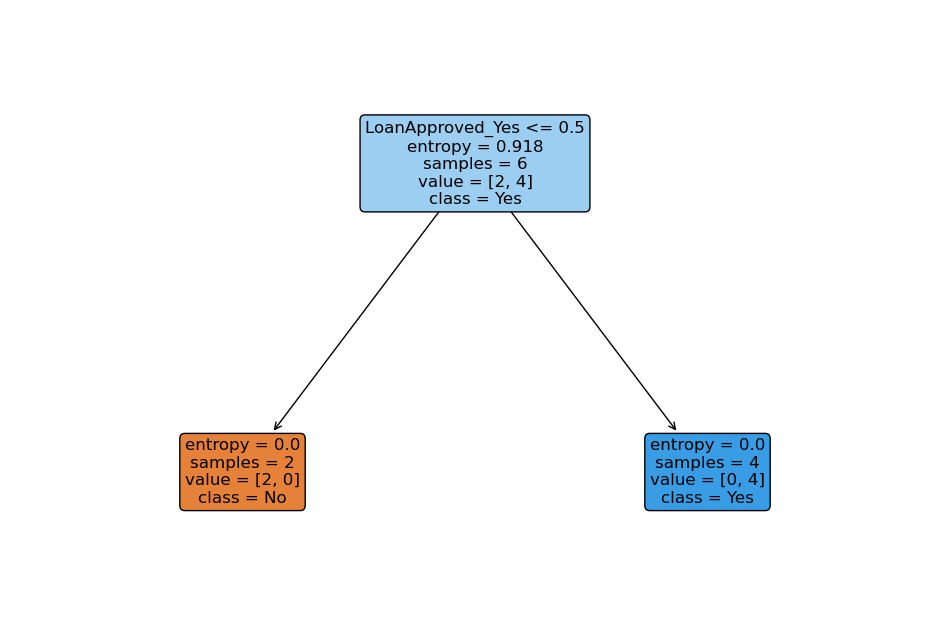

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Lab9_2.csv")
X = pd.get_dummies(data[['Income', 'Credit', 'LoanApproved']], drop_first=True)
y = data['LoanApproved']

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True, fontsize=12)
plt.show()


In [5]:
import pandas as pd
import math
from collections import Counter

data = pd.read_csv('Lab9_2.csv')

df = pd.DataFrame(data, columns=['Income', 'Credit', 'LoanApproved'])

def gini_impurity(data):
    total = len(data)
    if total == 0:
        return 0
    counts = Counter(data['LoanApproved'])
    impurity = 1
    for count in counts.values():
        prob = count / total
        impurity -= prob ** 2
    return impurity

def gini_for_split(data, feature):
    total = len(data)
    values = data[feature].unique()
    weighted_impurity = 0

    for value in values:
        subset = data[data[feature] == value]
        weighted_impurity += (len(subset) / total) * gini_impurity(subset)

    return weighted_impurity

def best_split(data, features):
    best_feature = None
    best_gini = float('inf')

    for feature in features:
        gini = gini_for_split(data, feature)
        if gini < best_gini:
            best_gini = gini
            best_feature = feature

    return best_feature

def build_tree(data, features):
    if len(set(data['LoanApproved'])) == 1:
        return data['LoanApproved'].iloc[0]

    if len(features) == 0:
        return Counter(data['LoanApproved']).most_common(1)[0][0]

    best_feature = best_split(data, features)

    tree = {best_feature: {}}

    remaining_features = [f for f in features if f != best_feature]
    feature_values = data[best_feature].unique()

    for value in feature_values:
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, remaining_features)

    return tree

def classify(tree, sample):
    while isinstance(tree, dict):
        feature = next(iter(tree))
        feature_value = sample[feature]
        tree = tree[feature].get(feature_value, None)
        if tree is None:
            return "Unknown"
    return tree

features = ['Income', 'Credit']

decision_tree = build_tree(df, features)

print("CART Decision Tree:", decision_tree)

new_sample = {'Income': 'Medium', 'Credit': 'Bad'}
classification = classify(decision_tree, new_sample)

print(f"Classification for new sample: {classification}")


CART Decision Tree: {'Credit': {'Good': 'Yes', 'Bad': {'Income': {'Low': 'No', 'Medium': 'Yes', 'High': 'No'}}}}
Classification for new sample: Yes


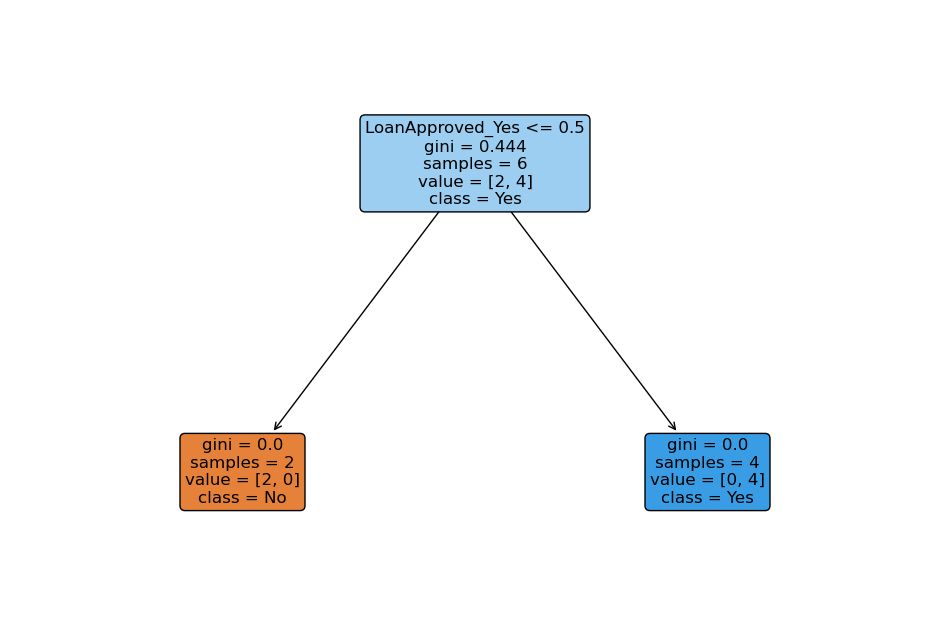

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Lab9_2.csv")
X = pd.get_dummies(data[['Income', 'Credit', 'LoanApproved']], drop_first=True)
y = data['LoanApproved']

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True, fontsize=12)
plt.show()
